In [325]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')

In [173]:
customer_acq = pd.read_csv(r"C:\Users\Lenovo\Downloads\Python\Python case studies\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv",index_col='No')
customer_acq

,Customer,Age,City,Product,Limit,Company,Segment
No,,,,,,,
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary


In [175]:
spend = pd.read_csv(r"C:\Users\Lenovo\Downloads\Python\Python case studies\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv",index_col='Sl No:')
spend

,Customer,Month,Type,Amount
Sl No:,,,,
1,A1,12-Jan-04,JEWELLERY,485470.80
2,A1,3-Jan-04,PETRO,410556.13
3,A1,15-Jan-04,CLOTHES,23740.46
4,A1,25-Jan-04,FOOD,484342.47
5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...
1496,A67,4-Feb-06,BUS TICKET,356872.73
1497,A68,25-Mar-06,BUS TICKET,204971.10
1498,A69,31-Mar-06,BUS TICKET,50449.44


In [177]:
repayment = pd.read_csv(r"C:\Users\Lenovo\Downloads\Python\Python case studies\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv").iloc[:1500,1:4]
repayment

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [179]:
temp_df = pd.merge(left=spend, right=customer_acq, how='inner', on='Customer')
temp_df

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,JEWELLERY,485470.80,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,PETRO,410556.13,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,CLOTHES,23740.46,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,FOOD,484342.47,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,CAMERA,369694.07,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1495,A67,4-Feb-06,BUS TICKET,356872.73,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,25-Mar-06,BUS TICKET,204971.10,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,31-Mar-06,BUS TICKET,50449.44,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,23-Mar-06,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001.0,C32,Self Employed


In [181]:
final_df = pd.merge(left=temp_df, right=repayment, how='inner', on='Customer',suffixes =['_spend','_repayment'])
final_df

,Customer,Month_spend,Type,Amount_spend,Age,City,Product,Limit,Company,Segment,Month_repayment,Amount_repayment
0,A1,12-Jan-04,JEWELLERY,485470.80,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,12-Jan-04,JEWELLERY,485470.80,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,12-Jan-04,JEWELLERY,485470.80,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,12-Jan-04,JEWELLERY,485470.80,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,12-Jan-04,JEWELLERY,485470.80,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A69,31-Mar-06,BUS TICKET,50449.44,33,CALCUTTA,Platimum,10000.0,C31,Self Employed,11-Jul-06,247628.45
37280,A70,23-Mar-06,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001.0,C32,Self Employed,23-Feb-05,327639.37
37281,A70,23-Mar-06,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001.0,C32,Self Employed,12-Aug-05,454016.51
37282,A71,24-Mar-06,BUS TICKET,194447.62,34,BOMBAY,Platimum,10002.0,C33,Self Employed,1-Feb-05,30997.74


In [183]:
# Type conversion
final_df = final_df.convert_dtypes()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer          37284 non-null  string 
 1   Month_spend       37284 non-null  string 
 2   Type              37284 non-null  string 
 3   Amount_spend      37284 non-null  Float64
 4   Age               37284 non-null  Int64  
 5   City              37284 non-null  string 
 6   Product           37284 non-null  string 
 7   Limit             37284 non-null  Int64  
 8   Company           37284 non-null  string 
 9   Segment           37284 non-null  string 
 10  Month_repayment   37284 non-null  string 
 11  Amount_repayment  37284 non-null  Float64
dtypes: Float64(2), Int64(2), string(8)
memory usage: 3.6 MB


In [185]:
final_df.Month_spend = pd.to_datetime(final_df.Month_spend)

In [187]:
final_df.Month_repayment = pd.to_datetime(final_df.Month_repayment)

In [224]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37284 entries, 0 to 37283
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer          37284 non-null  string        
 1   Month_spend       37284 non-null  datetime64[ns]
 2   Type              37284 non-null  string        
 3   Amount_spend      37284 non-null  Float64       
 4   Age               37284 non-null  Int64         
 5   City              37284 non-null  string        
 6   Product           37284 non-null  string        
 7   Limit             37284 non-null  Int64         
 8   Company           37284 non-null  string        
 9   Segment           37284 non-null  string        
 10  Month_repayment   37284 non-null  datetime64[ns]
 11  Amount_repayment  37284 non-null  Float64       
dtypes: Float64(2), Int64(2), datetime64[ns](2), string(6)
memory usage: 3.6 MB


## 1

### (a). In case age is less than 18, replace it with mean of age values.

In [191]:
 customer_acq.Age.mean()

46.49

In [193]:
customer_acq.Age[customer_acq.Age < 18] = customer_acq.Age.mean()

In [195]:
customer_acq.Age

No
1      76.0
2      71.0
3      34.0
4      47.0
5      56.0
       ... 
96     54.0
97     58.0
98     51.0
99     35.0
100    36.0
Name: Age, Length: 100, dtype: float64

### 1(b). In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [198]:
final_df[final_df.Amount_spend > final_df.Limit].Amount_spend = final_df[final_df.Amount_spend > final_df.Limit].Limit/2

In [200]:
final_df[final_df.Amount_spend > final_df.Limit].Amount_spend

126      155562.58
127      155562.58
128      155562.58
129      155562.58
130      155562.58
           ...    
37279     50449.44
37280     80593.94
37281     80593.94
37282    194447.62
37283    194447.62
Name: Amount_spend, Length: 13994, dtype: Float64

### 1(c).  Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [203]:
mask = final_df.Amount_repayment > final_df.Limit
final_df[mask].Amount_repayment = final_df[mask].Limit

In [205]:
final_df[mask]

,Customer,Month_spend,Type,Amount_spend,Age,City,Product,Limit,Company,Segment,Month_repayment,Amount_repayment
126,A8,2004-02-05,BIKE,155562.58,67,PATNA,Silver,100002,C8,Salaried_Pvt,2004-02-05,156913.59
127,A8,2004-02-05,BIKE,155562.58,67,PATNA,Silver,100002,C8,Salaried_Pvt,2004-01-12,350999.98
128,A8,2004-02-05,BIKE,155562.58,67,PATNA,Silver,100002,C8,Salaried_Pvt,2006-03-31,155642.95
129,A8,2004-02-05,BIKE,155562.58,67,PATNA,Silver,100002,C8,Salaried_Pvt,2005-05-09,145457.38
130,A8,2004-02-05,BIKE,155562.58,67,PATNA,Silver,100002,C8,Salaried_Pvt,2006-05-08,361184.89
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A69,2006-03-31,BUS TICKET,50449.44,33,CALCUTTA,Platimum,10000,C31,Self Employed,2006-07-11,247628.45
37280,A70,2006-03-23,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001,C32,Self Employed,2005-02-23,327639.37
37281,A70,2006-03-23,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001,C32,Self Employed,2005-08-12,454016.51
37282,A71,2006-03-24,BUS TICKET,194447.62,34,BOMBAY,Platimum,10002,C33,Self Employed,2005-02-01,30997.74


## 2. From the above dataset create the following summaries:

### a. How many distinct customers exist?

In [208]:
len(set(final_df.Customer))

100

### b. How many distinct categories exist

In [211]:
len(set(final_df.Type))

15

### c. What is the average monthly spend by customers?

In [214]:
final_df

,Customer,Month_spend,Type,Amount_spend,Age,City,Product,Limit,Company,Segment,Month_repayment,Amount_repayment
0,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,495414.75
1,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,245899.02
2,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,259490.06
3,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,437555.12
4,A1,2004-01-12,JEWELLERY,485470.8,76,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A69,2006-03-31,BUS TICKET,50449.44,33,CALCUTTA,Platimum,10000,C31,Self Employed,2006-07-11,247628.45
37280,A70,2006-03-23,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001,C32,Self Employed,2005-02-23,327639.37
37281,A70,2006-03-23,BUS TICKET,80593.94,16,BOMBAY,Platimum,10001,C32,Self Employed,2005-08-12,454016.51
37282,A71,2006-03-24,BUS TICKET,194447.62,34,BOMBAY,Platimum,10002,C33,Self Employed,2005-02-01,30997.74


In [216]:
final_df.Amount_spend.mean()

244782.0078591353

In [319]:
final_df['Month_Name'] = pd.to_datetime(final_df['Month_spend']).dt.strftime('%B')

# Pivot table to calculate the average monthly spend
average_monthly_spend = pd.pivot_table(data=final_df, values='Amount_spend', aggfunc='mean', index='Month_Name')

# Display the result
average_monthly_spend

,Amount_spend
Month_Name,
April,238523.142863
August,239720.511903
December,196878.070512
February,234747.176488
January,258340.458509
July,267259.617102
June,246540.849746
March,248371.437667
May,240881.374086


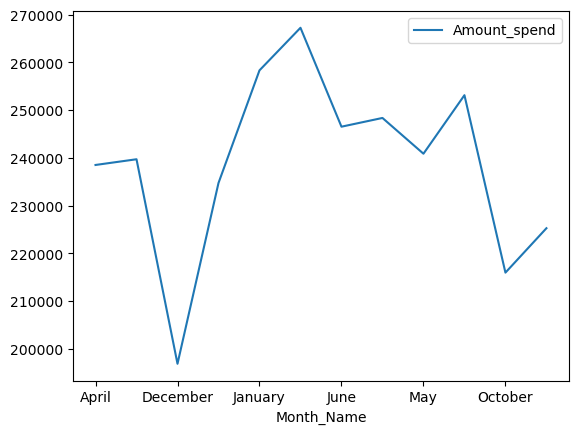

In [321]:
#plotting the graph

average_monthly_spend = pd.pivot_table(data=final_df, values='Amount_spend', aggfunc='mean', index='Month_Name').plot(kind='line')

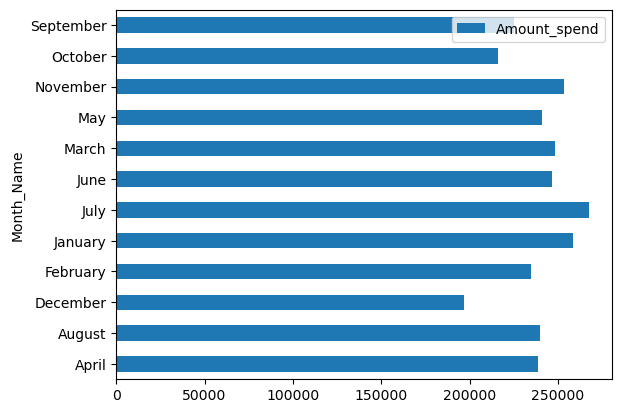

In [323]:
#plotting the graph

average_monthly_spend = pd.pivot_table(data=final_df, values='Amount_spend', aggfunc='mean', index='Month_Name').plot(kind='barh')

In [234]:
#Average spend by customers

final_df.groupby('Customer').agg({'Amount_spend':'mean'})

,Amount_spend
Customer,
A1,285705.708889
A10,213745.813889
A100,224786.88
A11,250957.093889
A12,263969.375484
...,...
A95,240401.5
A96,54729.66
A97,139018.26


### d. What is the average monthly repayment by customers?

In [242]:
final_df['Month_Name'] = pd.to_datetime(final_df['Month_repayment']).dt.strftime('%B')

# Pivot table to calculate the average monthly repayment
average_monthly_repayment = pd.pivot_table(data=final_df, values='Amount_repayment', aggfunc='mean', index='Month_Name')

# Display the result
average_monthly_repayment

,Amount_repayment
Month_Name,
April,262901.437043
August,255532.197616
December,293153.787384
February,248382.900787
January,246002.474478
July,257652.041785
June,221772.289435
March,239370.55719
May,263725.479701


In [248]:
# Ensure Amount_repayment is numeric
final_df['Amount_repayment'] = pd.to_numeric(final_df['Amount_repayment'], errors='coerce')

# Calculate Monthly Profit
final_df['Monthly_Profit'] = final_df['Amount_repayment'] - final_df['Amount_spend']

# Calculate Bank Profit (interest on positive Monthly Profit)
interest_rate = 2.9 / 100
final_df['Bank_Profit'] = final_df['Monthly_Profit'].apply(lambda x: x * interest_rate if x > 0 else 0)

# Display the resulting DataFrame with relevant columns
result = final_df[['Month_Name', 'Monthly_Profit', 'Bank_Profit']]
result

,Month_Name,Monthly_Profit,Bank_Profit
0,January,9943.95,288.37455
1,January,-239571.78,0.00000
2,January,-225980.74,0.00000
3,January,-47915.68,0.00000
4,January,-319497.92,0.00000
...,...,...,...
37279,July,197179.01,5718.19129
37280,February,247045.43,7164.31747
37281,August,373422.57,10829.25453
37282,February,-163449.88,0.00000


### f. What are the top 5 product types?

In [264]:
# select top 5 product_type, sum(aomunt) from final_df group by product_type order by sum(aomunt) desc

# Group by 'Type' and calculate the sum of 'Amount_spend', then sort in descending order
top_5_product_types = (
    final_df.groupby('Type')
    .agg({'Amount_spend': 'sum'})
    .sort_values(by='Amount_spend', ascending=False)
    .head(5)
)

top_5_product_types


,Amount_spend
Type,
PETRO,1185036116.09
CAMERA,1096148633.66
FOOD,950794596.35
TRAIN TICKET,852028849.25
AIR TICKET,811752331.97


### g. Which city is having maximum spend?

In [273]:
city_with_max_spend = (final_df.groupby('City').agg({'Amount_spend':'sum'}).sort_values(by='Amount_spend',ascending=False))

city_with_max_spend

,Amount_spend
City,
COCHIN,1806987281.66
BANGALORE,1702351988.19
CALCUTTA,1602128834.78
BOMBAY,1314893536.14
CHENNAI,859311827.78
TRIVANDRUM,711249836.49
PATNA,590856963.13
DELHI,538672112.85


In [277]:
# With Pivot table

pd.pivot_table(data=final_df,index='City',aggfunc='sum',values='Amount_spend').sort_values(by='Amount_spend',ascending=False)

,Amount_spend
City,
COCHIN,1806987281.66
BANGALORE,1702351988.19
CALCUTTA,1602128834.78
BOMBAY,1314893536.14
CHENNAI,859311827.78
TRIVANDRUM,711249836.49
PATNA,590856963.13
DELHI,538672112.85


### h. Which age group is spending more money?

In [282]:
# Define age bins and labels
age_bins = [0, 18, 30, 45, 60, 75, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-100']

# Create a new column for age groups
final_df['Age_Group'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by age groups and sum up the spending
age_group_spending = (
    final_df.groupby('Age_Group')
    .agg({'Amount_spend': 'sum'})
    .sort_values(by='Amount_spend', ascending=False)
)


age_group_spending


,Amount_spend
Age_Group,
19-30,2424482868.97
31-45,2293127669.71
46-60,2186698498.14
61-75,1280410999.65
76-100,481291091.55
0-18,460441253.0


In [295]:
#other method

final_df['Age Group'] = pd.qcut(final_df.Age,3,labels=['Youth','MidAge','Senior'])

pd.pivot_table(final_df,values='Amount_spend',index='Age Group',aggfunc='sum').sort_values(by='Amount_spend',ascending=False)

,Amount_spend
Age Group,
MidAge,3343125660.73
Youth,3170151222.45
Senior,2613175497.84


### i. Who are the top 10 customers in terms of repayment?

In [287]:
final_df.groupby('Customer').agg({'Amount_repayment':sum}).sort_values(by='Amount_repayment',ascending=False).head(10)

,Amount_repayment
Customer,
A61,400487430.58
A60,375299048.12
A22,309294535.44
A21,298859092.95
A13,296732020.46
A43,263186015.26
A45,261898380.97
A12,258377564.96
A48,257064919.25


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [297]:
final_df['Year']=final_df.Month_spend.dt.year

<Axes: xlabel='City,Year'>

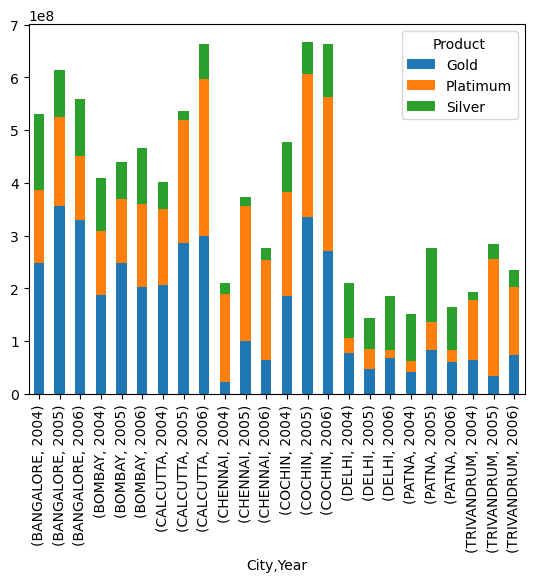

In [313]:
df_1 = pd.pivot_table(data=final_df,values='Amount_spend',index=['City','Year'],columns='Product',aggfunc='sum')

df_1.plot(kind='bar',stacked=True)

## 4. Create graphs for

 ### a. Monthly comparison of total spends, city wise

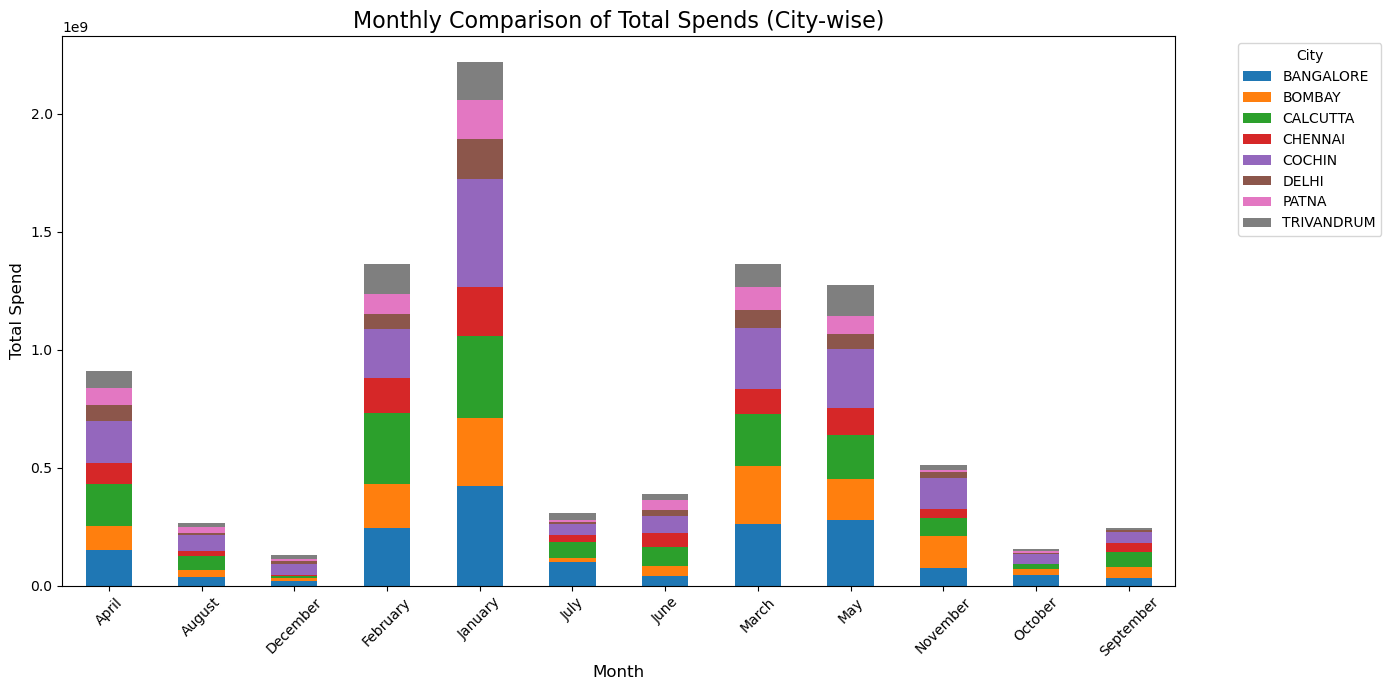

In [327]:
# Extract the month from the 'Month_spend' column
final_df['Month'] = pd.to_datetime(final_df['Month_spend']).dt.month_name()

# Group by city and month to calculate total spends
city_month_spends = final_df.groupby(['City', 'Month'])['Amount_spend'].sum().reset_index()

# Create a pivot table for visualization
pivot_city_month = city_month_spends.pivot(index='Month', columns='City', values='Amount_spend')

# Plot the graph
pivot_city_month.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Monthly Comparison of Total Spends (City-wise)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### b. Comparison of yearly spend on air tickets

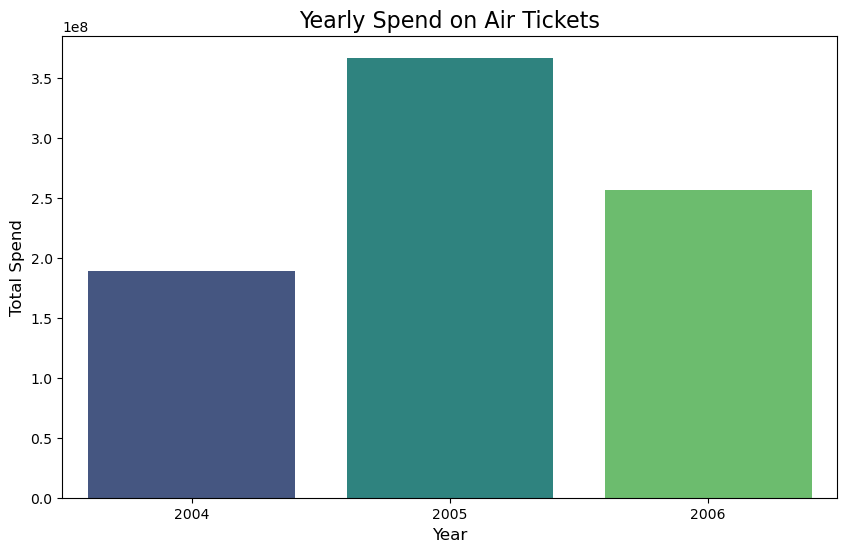

In [347]:
# Filter data for air tickets
air_tickets_df = final_df[final_df['Type'] == 'AIR TICKET']

# Extract year from 'Month_spend'
air_tickets_df['Year'] = pd.to_datetime(air_tickets_df['Month_spend']).dt.year

# Group by year and calculate total spends
yearly_air_ticket_spends = air_tickets_df.groupby('Year')['Amount_spend'].sum().reset_index()

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_air_ticket_spends, x='Year', y='Amount_spend', palette='viridis')
plt.title('Yearly Spend on Air Tickets', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.show()


### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

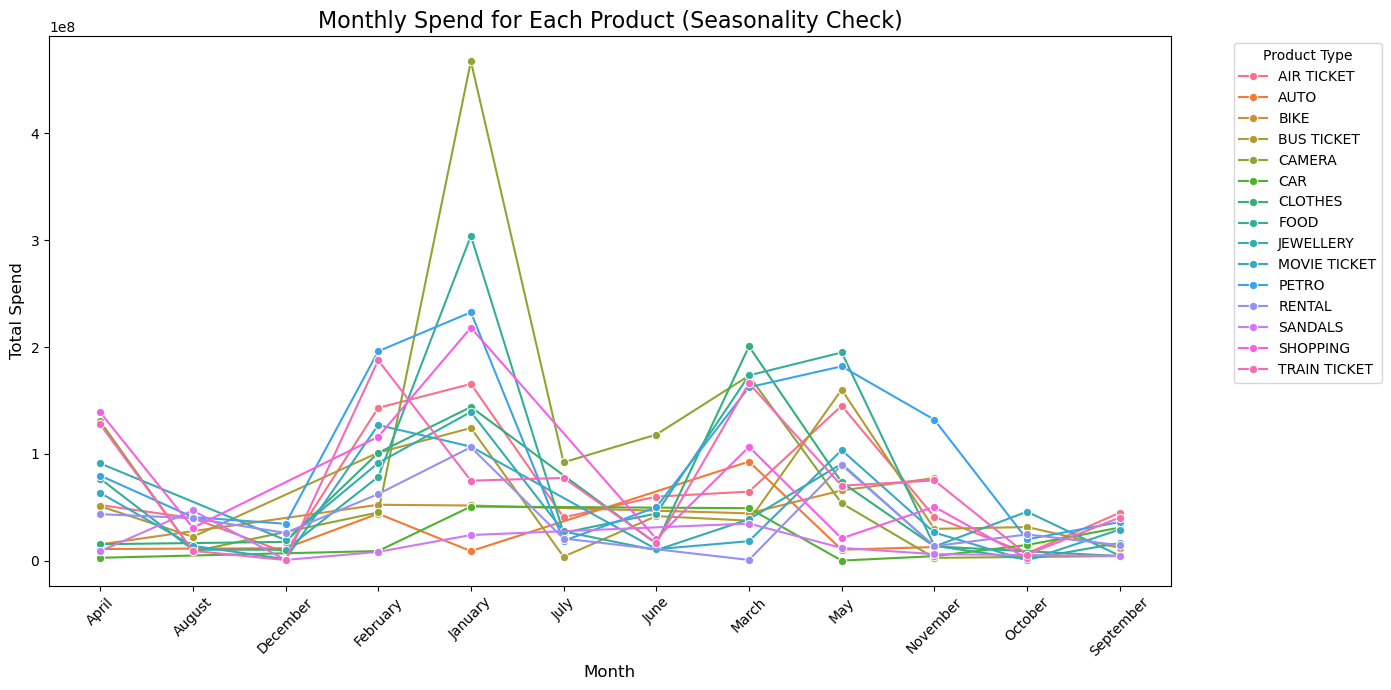

In [331]:
# Group by product type and month to calculate total spends
product_month_spends = final_df.groupby(['Type', 'Month'])['Amount_spend'].sum().reset_index()

# Plot the graph
plt.figure(figsize=(14, 7))
sns.lineplot(data=product_month_spends, x='Month', y='Amount_spend', hue='Type', marker='o')
plt.title('Monthly Spend for Each Product (Seasonality Check)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. 
### The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers 

In [375]:
df = final_df.Product == 'Gold'

pd.pivot_table(data=final_df,values='Amount_spend',index='City',columns='Month',aggfunc=sum)

Month,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,151447721.55,38178268.36,18252989.73,243726008.87,421877768.73,98658591.55,39504120.62,263047564.91,275940393.18,73316216.21,45640903.2,32761441.28
BOMBAY,101702662.58,27596729.9,14352775.73,187312996.78,289199514.87,19552902.45,44345929.47,243832444.09,177831355.45,137155048.98,24642756.44,47368419.4
CALCUTTA,177463622.99,59246350.79,8968889.65,300578464.99,348750796.52,67075427.56,78771769.88,220839909.6,184129124.08,76799592.12,19296366.02,60208520.58
CHENNAI,87023210.14,21128891.96,4248937.13,149169429.49,206351199.05,29533871.68,59017920.9,106679229.61,114752933.3,36556171.44,2968696.23,41881336.85
COCHIN,180563851.88,68098755.16,45205741.7,208943898.6,456306793.84,47771133.97,75368970.56,256196604.98,248471084.26,131191111.95,42611867.84,46257466.92
DELHI,67385523.82,9514694.52,15189516.67,62249510.51,173417785.13,8791182.72,22816012.64,78516401.65,64015232.92,28136517.93,2003079.26,6636655.08
PATNA,70353411.65,23403425.65,6940974.71,83535520.7,162712214.78,5921100.13,42544689.84,97679012.63,79604783.41,7998382.35,8897508.18,1265939.1
TRIVANDRUM,73071692.84,16046005.73,17567213.5,127895771.1,159753444.3,29777089.99,25685883.59,97016396.76,128072274.07,21962737.47,7710711.84,6690615.3


In [365]:
def my_func(data,products='Gold',time_period='Year'):
    data = data[data.Product == products]
    if time_period == 'Month':
        time_period_col = 'Month_Name'
    elif time_period == 'Year':
        time_period_col = 'Year'
        
    output = pd.pivot_table(data=final_df, values='Amount_spend', index='City', columns=time_period_col,aggfunc=sum)
    return output


In [373]:
my_func(data=final_df,products='Silver',time_period='Month')

Month_Name,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,151447721.55,38178268.36,18252989.73,243726008.87,421877768.73,98658591.55,39504120.62,263047564.91,275940393.18,73316216.21,45640903.2,32761441.28
BOMBAY,101702662.58,27596729.9,14352775.73,187312996.78,289199514.87,19552902.45,44345929.47,243832444.09,177831355.45,137155048.98,24642756.44,47368419.4
CALCUTTA,177463622.99,59246350.79,8968889.65,300578464.99,348750796.52,67075427.56,78771769.88,220839909.6,184129124.08,76799592.12,19296366.02,60208520.58
CHENNAI,87023210.14,21128891.96,4248937.13,149169429.49,206351199.05,29533871.68,59017920.9,106679229.61,114752933.3,36556171.44,2968696.23,41881336.85
COCHIN,180563851.88,68098755.16,45205741.7,208943898.6,456306793.84,47771133.97,75368970.56,256196604.98,248471084.26,131191111.95,42611867.84,46257466.92
DELHI,67385523.82,9514694.52,15189516.67,62249510.51,173417785.13,8791182.72,22816012.64,78516401.65,64015232.92,28136517.93,2003079.26,6636655.08
PATNA,70353411.65,23403425.65,6940974.71,83535520.7,162712214.78,5921100.13,42544689.84,97679012.63,79604783.41,7998382.35,8897508.18,1265939.1
TRIVANDRUM,73071692.84,16046005.73,17567213.5,127895771.1,159753444.3,29777089.99,25685883.59,97016396.76,128072274.07,21962737.47,7710711.84,6690615.3


In [409]:
## Other Method

## Filtering 
data = final_df

selected_time_period = 'Year'

selected_product = 'Silver'

data[data.Product == selected_product]



# Apply it here
df_2 = pd.pivot_table(data=data,columns='City',index=selected_time_period, values='Amount_spend', aggfunc=sum)

df_2

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Year,,,,,,,,
2004,531131196.7,409711371.67,402273400.39,209681546.36,477469073.89,209584367.26,150622829.83,192599412.3
2005,613050319.86,439887675.11,536662890.32,373494098.23,666989426.54,143394816.89,275996205.87,283745052.77
2006,558170471.63,465294489.36,663192544.07,276136183.19,662528781.23,185692928.7,164237927.43,234905371.42
